In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from joblib import dump, load
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'../Data/raw_data/test_data.csv')

In [5]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.701467,-0.062754,0.405692,0.374299,0.425804,0.476822,0.346430,-0.405724,1.292818,0.419370,...,0.115249,-1.062692,0.098032,-0.498470,0.464774,-0.360343,-0.258456,-0.025794,2056.65,1
1,-0.017828,-0.787527,-0.175992,0.342837,0.444678,0.397800,1.017235,-0.155666,0.029167,0.404799,...,0.092676,0.450409,1.293699,0.939824,-0.982383,-0.756673,-0.207628,0.224079,2962.02,1
2,-0.460915,0.162009,1.239073,-0.459821,-0.089612,0.887472,0.169089,0.039875,1.240379,1.562914,...,0.047793,0.984126,-0.063013,-0.555160,-0.300825,-0.518720,-0.400800,0.603467,16909.31,0
3,-0.741700,-1.691252,1.687077,-0.280649,0.312057,-0.186968,0.220536,0.046054,0.981095,0.145073,...,-0.003096,-0.597387,0.483980,0.813886,0.602211,0.495603,-0.105966,-0.996438,6037.38,0
4,-1.535125,1.560825,-1.532835,0.766716,-1.557192,-1.825033,-1.208154,1.932372,-0.600694,-0.860507,...,0.258426,-0.883762,-0.288847,-0.017126,0.971460,-0.619259,1.251792,0.416460,16565.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113721,1.517349,-0.637935,0.300655,-0.141095,0.054927,0.490138,0.249502,-0.108838,1.097624,0.780150,...,0.011234,0.653206,0.019478,-0.760129,-0.353673,-1.397638,-0.201044,-0.181808,1974.04,0
113722,-0.493493,0.713977,-1.105530,0.714599,-0.998017,-2.314646,-1.271085,0.324097,-1.126004,-1.978954,...,0.607915,-0.045150,-0.358117,0.695904,1.974836,-1.219535,3.348935,2.568916,16091.96,1
113723,-2.124483,2.177749,-1.925538,1.555588,-2.432495,-0.552083,-2.620918,-0.352423,-2.588901,-2.444236,...,-1.407977,0.688224,0.224247,1.009917,-0.512910,0.017949,-2.985199,-2.244581,8622.88,1
113724,0.903265,-0.074423,0.016104,0.121508,0.620994,-0.003419,0.520128,-0.135018,0.417449,-0.035476,...,-0.234021,-0.623409,-0.146087,-0.331444,0.950474,-0.803822,-0.124774,0.180102,12504.33,1


In [6]:
X_test = df.drop('Class', axis=1)
y_test = df['Class']

In [10]:
scaler = joblib.load(r'..\Preprocessing\scaler_amount.pkl')
pca = joblib.load(r'..\Preprocessing\pca.pkl')
final_model_lr = joblib.load(r'..\Models\final_model_lr.pkl')

In [11]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [14]:
X_test.rename(columns={'Amount': 'Amount_scaled'}, inplace=True)

In [15]:
X_test = pca.transform(X_test)

In [16]:
X_test

array([[ 2.12600433,  0.62142942, -0.38415122, ...,  0.55003781,
        -0.27173923, -0.52428512],
       [ 1.03775847, -0.92479988, -0.59717285, ...,  0.15877847,
        -0.59106733,  0.3165472 ],
       [ 2.30086366, -0.35235693,  0.20154119, ...,  0.4350934 ,
         0.23700328,  0.48603111],
       ...,
       [-6.93667041, -4.09120946, -0.10478743, ..., -0.25797763,
         0.11092669,  0.09011748],
       [ 2.20695771,  0.76304164, -0.62829448, ...,  0.02277805,
         0.50646316,  0.34476745],
       [-6.92891966,  0.36077007,  2.47229586, ...,  0.09579579,
        -0.22730535,  0.28660517]], shape=(113726, 22))

In [18]:
n_components = X_test.shape[1]
pca_columns = [f'Comp{i+1}' for i in range(n_components)]

X_test = pd.DataFrame(X_test, columns=pca_columns, index=df.index)

In [19]:
X_test

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,...,Comp13,Comp14,Comp15,Comp16,Comp17,Comp18,Comp19,Comp20,Comp21,Comp22
0,2.126004,0.621429,-0.384151,-0.858835,-1.144008,1.704764,-1.010066,-1.338693,-0.052743,0.651427,...,-0.009221,-0.054073,0.201832,0.081298,0.565584,0.622827,0.078311,0.550038,-0.271739,-0.524285
1,1.037758,-0.924800,-0.597173,0.557639,0.546057,-1.439177,-1.372578,-0.211908,0.191004,0.318152,...,0.285455,0.475131,-1.511579,1.539773,-0.068071,0.153484,0.501500,0.158778,-0.591067,0.316547
2,2.300864,-0.352357,0.201541,0.462185,0.266101,-0.990964,0.234209,1.334357,-1.080373,-0.473720,...,-1.051532,-0.531339,0.263222,0.258941,-0.100958,1.269326,-0.069296,0.435093,0.237003,0.486031
3,2.170211,-0.528302,0.435895,-0.065479,-0.644908,0.167659,-0.985766,0.229291,0.493172,-0.305791,...,0.017986,-0.916023,-1.676414,-0.267058,0.766021,-0.315059,0.809790,0.822423,0.342007,-0.704458
4,-4.239576,1.672411,1.170269,-0.529539,-1.334744,-1.096523,0.396789,0.794617,-0.853403,-0.903834,...,-1.001015,0.354119,-0.336219,-0.328681,-0.285944,0.128104,0.070943,-0.104799,-0.336152,-0.268671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113721,2.664456,-0.493211,-0.374172,-0.271300,-0.089505,-0.994596,-1.222797,-0.881040,-1.386023,-0.122712,...,0.399091,1.344924,0.261889,-0.125460,-0.404098,0.417843,0.125188,0.435344,0.067146,0.243553
113722,-6.458892,2.763289,0.914970,0.291115,0.072213,-2.546560,-0.224885,2.076274,-0.660692,1.595265,...,1.258169,-0.113109,0.766231,-0.386532,-0.353786,-0.246887,-1.087635,-0.185981,0.984988,-0.512652
113723,-6.936670,-4.091209,-0.104787,0.857046,-1.294566,0.768974,-0.040588,-1.242883,0.849554,-1.651322,...,-0.181243,-0.279191,-0.053655,-0.097703,1.094546,-0.893396,-0.114464,-0.257978,0.110927,0.090117
113724,2.206958,0.763042,-0.628294,-2.436906,-0.776470,-0.589052,0.356197,-0.808776,-0.161041,-0.420493,...,0.285369,0.400930,0.054494,1.026375,0.137747,0.374581,-0.191765,0.022778,0.506463,0.344767


In [21]:
y_pred = final_model_lr.predict(X_test)

In [24]:
print( "Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.9616710338884688
Recall: 0.9469602377644514
F1 Score: 0.9610987657626302
Precision: 0.9756658815002718


In [25]:
y_proba = final_model_lr.predict_proba(X_test)[:, 1]

In [27]:
print("ROC AUC:", roc_auc_score(y_test, y_proba))

ROC AUC: 0.9924685165125599


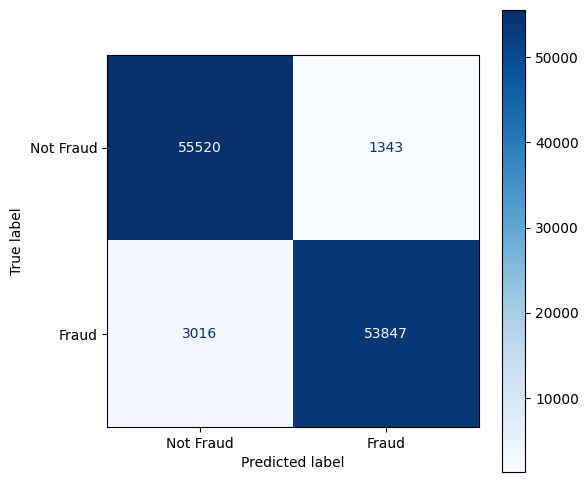

In [57]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud', 'Fraud']
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax)

In [59]:
fig.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')